Аббревиатура XML расшифровывается как eXtensible Markup Language — расширяемый язык разметки. Он (язык) позволяет описывать документы, используя теги.

Если вы когда-нибудь сталкивались с HTML, языком разметки для создания веб-страниц, то можете заметить, что XML очень похож на него. Однако в отличие от HTML, где теги заранее чётко заданы, в XML мы можем задавать теги сами.

Например, если мы хотим описать меню в ресторане в формате XML-документа, мы можем сделать это так:

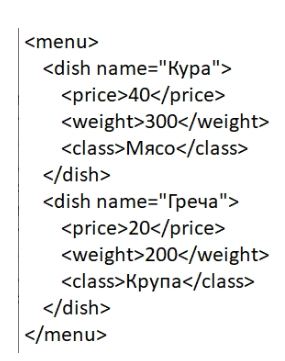

В примере выше довольно жёсткая структура: у нас есть меню  — тег <menu>, где хранятся объекты, то есть конкретные блюда, помеченные тегом <dish>. У каждого из блюд есть параметр name, в котором прописано имя блюда. Можно считать, что <dish> — класс этого объекта.

Внутри каждого объекта-блюда находится набор значений, которые тоже задаются тегами. Например, внутри тега <price> находится значение 20, означающее цену данного блюда. Тег <price> и другие теги внутри можно рассматривать как атрибуты класса dish.

Файлы XML не всегда имеют жёсткую структуру и не обязаны её иметь, но чаще всего какая-то структура внутри файла будет. Почему? Потому что обычно XML не пишут вручную. Такие файлы генерируются кодом и читаются тоже кодом. Поэтому при наличии понятной структуры обработка файла становится намного проще.

ИЗВЛЕКАЕМ КОНТЕНТ ИЗ XML-ФАЙЛА

Данные в формате XML имеют древовидную структуру. 

Что такое дерево? Это структура, которая имеет узлы и связи между ними. Самый верхнеуровневый узел называется корнем, а всё, что находится в самом низу, называется листьями. 

В примере из прошлого юнита корнем является <menu>, а листьями, например, <price> и <weight>.

Кроме того, у <menu> есть дети (потомки) — это два узла <dish>, имеющие разное значение атрибута <name>.

Таким образом, в файле используется набор тегов, внутри которых могут находиться другие теги со своими значениями.

Для работы с XML-файлами мы будем использовать модуль ElementTree , входящий в стандартный пакет xml. Этот модуль позволит нам «перемещаться» по дереву XML и смотреть, что находится в каждом его узле, начиная с корня и заканчивая листьями.

Импортируем этот модуль под псевдонимом ET: 

In [1]:
import xml.etree.ElementTree as ET # Импортируем модуль ElementTree

 Мы будем работать с представленной выше структурой XML-файла. Скачайте файл, откройте его и посмотрите на содержимое (можно использовать любой текстовый редактор, например Блокнот). Скопируйте скачанный файл menu.xml в папку, в которой будете работать (в этой же папке вы будете создавать файлы Jupyter Notebook с кодом и запускать код на выполнение).

In [2]:
import xml.etree.ElementTree as ET # Импортируем модуль ElementTree
tree = ET.parse('menu.xml')

КОРЕНЬ

Запишем в переменную root корневой узел дерева tree и посмотрим, как выглядит содержимое переменной root, для чего выполним код:

In [3]:
root = tree.getroot()
display(root)

<Element 'menu' at 0x7ff4d69597c0>

Мы видим, что в корне находится 'menu'. Всё правильно, мы и предполагали увидеть именно это. 

Какой тип у этого объекта? Если мы вызовем встроенный в Python метод type() и передадим ему root , то увидим, что это тип xml.etree.ElementTree.Element. Такой тип будет у любого узла в дереве.

In [4]:
display(type(root))

xml.etree.ElementTree.Element

ПОТОМКИ

Для того чтобы посмотреть список потомков корневого узла, выполним следующий код:

In [5]:
display(list(root))

[<Element 'dish' at 0x7ff4d68f34f0>, <Element 'dish' at 0x7ff4d68f32c0>]

Если у узла нет потомков, то вернётся пустой список — [].

Итак, использование list(root) возвращает список потомков указанного узла. У узла root, который представляет меню, два потомка, а именно — два блюда, которые представлены тегами dish.

Для того чтобы получить список потомков второго блюда в нашем меню и вывести его на экран, выполним код:

АТРИБУТЫ И ТЕГИ

Как было сказано ранее, у узлов могут быть параметры, или атрибуты. Например, у узлов dish есть атрибут name, который хранит название блюда.

Мы можем непосредственно обратиться к атрибутам, используя attrib.

Выведем на экран атрибуты первого блюда из меню:

In [7]:
display(root[0].attrib)

{'name': 'Кура'}

В XML-узлах часто хранятся количественные показатели. Эти показатели хранятся в виде текста, и прочитать их можно, обратившись к атрибуту text у соответствующего объекта типа ElementTree.Element.

Например, возьмём узел price первого блюда из меню:

In [8]:
display(root[0][0])

<Element 'price' at 0x7ff4d68f33b0>

Теперь прочитаем значение этого узла с помощью text:

In [9]:
display(root[0][0].text)

'40'

Все значения в XML, даже числовые, хранятся как строки, поэтому преобразовывать их к нужному типу вам нужно самим.

Например, в данном случае можно обернуть значение стоимости в int() или float().

Если вы хотите прочитать наименование тега конкретного узла, необходимо использовать tag. Например, получим наименование тега корневого узла:

In [10]:
display(root.tag)

'menu'

In [12]:
display(root[0][2])

<Element 'class' at 0x7ff4d68f3360>

ИСПОЛЬЗОВАНИЕ ЦИКЛОВ

→ Итак, мы научились обращаться к отдельным узлам дерева, представляющего XML-структуру, и извлекать информацию о его атрибутах, значении и потомках.

На этом шаге мы решим задачу вывода на экран наименование всех блюд из меню, а также информацию о них (иными словами, нам необходимо обойти дерево и вывести на экран значения его листьев).

Используя цикл for, автоматизируем обход дерева. Для этого напишем следующий код:

In [13]:
for dish in root:
    for param in dish:
        print(dish.attrib['name'], param.tag, param.text)
    print()

Кура price 40
Кура weight 300
Кура class Мясо

Греча price 20
Греча weight 200
Греча class Крупа



 В этом коде реализован следующий алгоритм:

В первом (внешнем) цикле перебираем потомков корня дерева (root). Потомки перебираются последовательно при помощи переменной dish. Это отдельные блюда из меню.

Во втором (вложенном) цикле аналогичным образом перебираем потомков каждого блюда. Этими потомками являются параметры блюда — его цена (price), вес (weight) и класс (class).

После этого выводим на экран название блюда (значение атрибута name), название очередного параметра (tag) и его значение (text).

Дополнительная функция print() в цикле верхнего уровня предназначена для организации более удобного восприятия информации — между отдельными блюдами будет выведена пустая строка.
На выходе получаем:

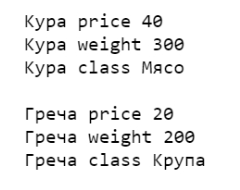

Cтандартных средств для превращения XML-файла в DataFrame нет, но если XML-файл содержит чёткую структуру, сделать это средствами Python достаточно просто.

Покажем, как это сделать, на примере работы с нашим файлом-меню.

✍ Реализуем следующий алгоритм:

Загрузить XML-структуру файла menu.xml в переменную root.
Создать пустой список df_list (в него будем добавлять строчки итоговой таблицы).

Заранее создать список column_names с именами столбцов — название блюда (name), его цена (price), вес (weight) и класс (class).

В цикле организовать обход xml-дерева из корня по всем потомкам.

На каждой итерации цикла сформировать в виде списка строку таблицы, содержащую информацию: наименование блюда (атрибут name узла dish) и значения потомков этого узла — узлов price, weight, class.

Добавить сформированную строку в список df_list, используя метод append().

Сформировать из вложенного списка DataFrame. Имена для столбцов взять из списка column_names.

Код, который реализует этот алгоритм:

In [14]:
import xml.etree.ElementTree as ET
tree = ET.parse('menu.xml')
root = tree.getroot()

import pandas as pd
column_names = ['name', 'price', 'weight', 'class']
df_list = []

for dish in root:
    row = [dish.attrib['name'], dish[0].text, dish[1].text, dish[2].text]
    df_list.append(row)
    df = pd.DataFrame(df_list, columns=column_names)
display(df)

,name,price,weight,class
0,Кура,40,300,Мясо
1,Греча,20,200,Крупа


СОЗДАЁМ XML-ФАЙЛ

→ Воссоздадим структуру нашего исходного XML-файла с нуля,  руководствуясь общими рекомендациями.

Чтобы создать корень дерева, используем метод Element() из класса ElementTree:

In [15]:
import xml.etree.ElementTree as ET

new_root = ET.Element('menu')
display(new_root)

<Element 'menu' at 0x7ff4b851a2c0>

Теперь мы можем добавлять новые узлы в наше дерево, используя метод SubElement() из того же класса.

Добавим в наше меню двух потомков корневого узла, которые будут представлять два блюда, то есть будут узлами dish:

In [16]:
dish1 = ET.SubElement(new_root, 'dish', name='Кура')
dish2 = ET.SubElement(new_root, 'dish', name='Греча')
display(list(new_root))

[<Element 'dish' at 0x7ff4b851a310>, <Element 'dish' at 0x7ff4b8521310>]

В метод SubElement() мы передали первым аргументом узел, к которому добавляем потомка, вторым аргументом — наименование нового тега (dish),  третьим аргументом — наименование атрибута нового узла( name ) и его значение.

Аналогичным образом можно добавлять новые узлы к любым существующим узлам, не только к корню.


Добавим в создаваемую структуру по три потомка (атрибута) к двум новым узлам, которые будут содержать информацию о блюде — о его цене (price), весе (weight) и классе (class), а также значение этих атрибутов:

In [17]:
price1 = ET.SubElement(dish1, "price").text = "40"
weight1 = ET.SubElement(dish1, "weight").text = "300"
class1 = ET.SubElement(dish1, "class").text = "Мясо"
display(list(dish1))

price2 = ET.SubElement(dish2, "price").text = "20"
weight2 = ET.SubElement(dish2, "weight").text = "200"
class2 = ET.SubElement(dish2, "class").text = "Крупа"
display(list(dish2))

[<Element 'price' at 0x7ff4bced4360>,
 <Element 'weight' at 0x7ff49ba2b0e0>,
 <Element 'class' at 0x7ff49ba2b950>]

[<Element 'price' at 0x7ff49ba2b090>,
 <Element 'weight' at 0x7ff49ba2bc20>,
 <Element 'class' at 0x7ff49ba2b900>]

Проверим визуально корректность созданной нами структуры, выполнив фрагмент кода, разработанного ранее:

In [18]:
for dish in new_root:
    for param in dish:
        print(dish.attrib['name'], param.tag, param.text)
    print()

Кура price 40
Кура weight 300
Кура class Мясо

Греча price 20
Греча weight 200
Греча class Крупа



Созданная нами структура полностью идентична структуре исходного XML-файла.

СОХРАНЕНИЕ XML-ФАЙЛА

→ В финале работы с файлом XML-формата запишем созданную нами структуру как XML-файл на диск.

Преобразуем созданный нами объект типа ElementTree.Element в строку c помощью метода tostring(), передав наше новое дерево как аргумент. Сохраним эту строку на диске, используя стандартные средства Python::

In [19]:
new_root_string = ET.tostring(new_root)
with open("new_menu.xml", "wb") as f:
    f.write(new_root_string)

 Файл записан! Откройте его и посмотрите, что получилось.

Возможно, вы увидите проблему, связанную с кодировкой. Что делать в этом случае? Как вариант — записать файл, используя сам класс ElementTree() :

In [20]:
ET.ElementTree(new_root).write('new_menu_good.xml', encoding="utf-8")

Для этого мы передаём в класс ElementTree() наше дерево (не его строковое представление) и вызываем метод write(). В метод мы передаём путь к новому файлу и нужную нам кодировку.

https://www.geeksforgeeks.org/working-zip-files-python/

https://www.geeksforgeeks.org/working-zip-files-python/

https://realpython.com/python-json/

https://medium.com/nastia-shu/больше-не-нужно-открывать-сотни-файлов-в-excel-e0a1f5a9e9a7

https://habr.com/ru/company/otus/blog/331998/

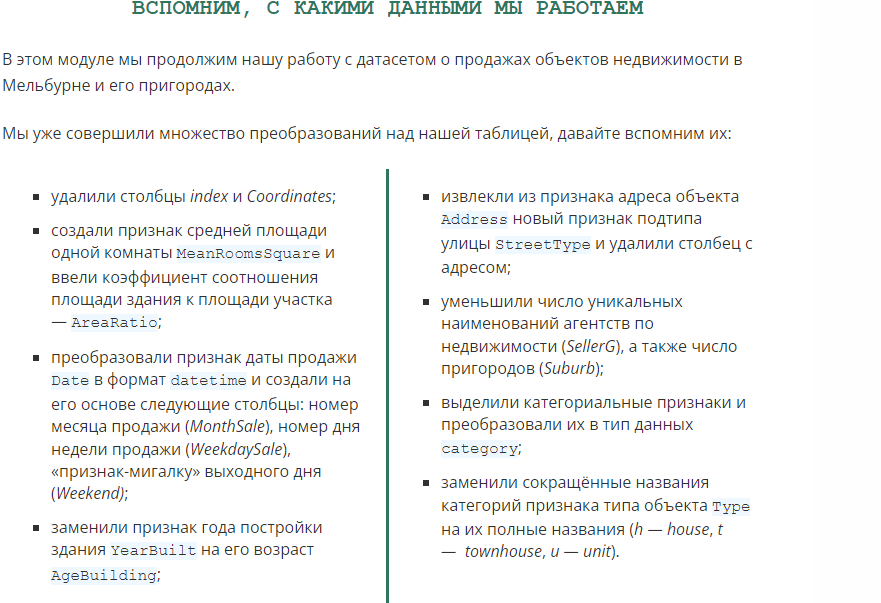

In [21]:
import pandas as pd

melb_df = pd.read_csv('melb_data_fe.zip')
melb_df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend
0,Abbotsford,2,house,1480000.0,S,Biggin,2016-03-12,2.5,3067,2,...,144.9984,Northern Metropolitan,4019,25.20,-0.231707,3,46,5,St,1
1,Abbotsford,2,house,1035000.0,S,Biggin,2016-04-02,2.5,3067,2,...,144.9934,Northern Metropolitan,4019,15.80,-0.327660,4,116,5,St,1
2,Abbotsford,3,house,1465000.0,SP,Biggin,2017-04-03,2.5,3067,3,...,144.9944,Northern Metropolitan,4019,18.75,0.056338,4,117,0,St,0
3,Abbotsford,3,house,850000.0,PI,Biggin,2017-04-03,2.5,3067,3,...,144.9969,Northern Metropolitan,4019,15.75,0.145455,4,47,0,other,0
4,Abbotsford,4,house,1600000.0,VB,Nelson,2016-04-06,2.5,3067,3,...,144.9941,Northern Metropolitan,4019,17.75,0.083969,4,2,2,St,0


In [22]:
display(melb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Suburb           13580 non-null  object 
 1   Rooms            13580 non-null  int64  
 2   Type             13580 non-null  object 
 3   Price            13580 non-null  float64
 4   Method           13580 non-null  object 
 5   SellerG          13580 non-null  object 
 6   Date             13580 non-null  object 
 7   Distance         13580 non-null  float64
 8   Postcode         13580 non-null  int64  
 9   Bedroom          13580 non-null  int64  
 10  Bathroom         13580 non-null  int64  
 11  Car              13580 non-null  int64  
 12  Landsize         13580 non-null  float64
 13  BuildingArea     13580 non-null  float64
 14  CouncilArea      12211 non-null  object 
 15  Lattitude        13580 non-null  float64
 16  Longtitude       13580 non-null  float64
 17  Regionname  

None

Обратите внимание, что наше преобразование столбцов к типам datetime и category слетело.

?
Почему это произошло?

Ответ на самом деле очень прост: csv-файл не хранит в себе информацию о типах данных столбцов, поэтому при чтении Pandas автоматически определяет тип данных столбца. Не забывайте об этом, обмениваясь преобразованными данными с вашими коллегами.

А пока предлагаем вам самим совершить преобразование столбцов к нужным типам данных ↓

Преобразуйте столбец Date в формат datetime и выделите квартал (quarter) продажи объектов недвижимости. Найдите второй по популярности квартал продажи. В качестве ответа запишите число объектов, проданных в этом квартале.

In [24]:
melb_df['Date'] = pd.to_datetime(melb_df['Date'])
melb_df['Date']

0       2016-03-12
1       2016-04-02
2       2017-04-03
3       2017-04-03
4       2016-04-06
           ...    
13575   2017-08-26
13576   2017-08-26
13577   2017-08-26
13578   2017-08-26
13579   2017-08-26
Name: Date, Length: 13580, dtype: datetime64[ns]

In [25]:
quarters = melb_df['Date'].dt.quarter
print(quarters.value_counts().iloc[1])

4359


Преобразуйте все столбцы, в которых меньше 150 уникальных значений, в тип данных category, исключив из преобразования столбцы Date, Rooms, Bedroom, Bathroom, Car.
В качестве ответа запишите результирующее количество столбцов, которые имеют тип данных category.

In [27]:
cols_to_exclude = ['Date', 'Rooms', 'Bedroom', 'Bathroom', 'Car'] 
max_unique_count = 150 
for col in melb_df.columns: 
    if melb_df[col].nunique() < max_unique_count and col not in cols_to_exclude: 
        melb_df[col] = melb_df[col].astype('category')
display(melb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suburb           13580 non-null  category      
 1   Rooms            13580 non-null  int64         
 2   Type             13580 non-null  category      
 3   Price            13580 non-null  float64       
 4   Method           13580 non-null  category      
 5   SellerG          13580 non-null  category      
 6   Date             13580 non-null  datetime64[ns]
 7   Distance         13580 non-null  float64       
 8   Postcode         13580 non-null  int64         
 9   Bedroom          13580 non-null  int64         
 10  Bathroom         13580 non-null  int64         
 11  Car              13580 non-null  int64         
 12  Landsize         13580 non-null  float64       
 13  BuildingArea     13580 non-null  float64       
 14  CouncilArea      12211 non-null  categ

None

Теперь мы сможем скомпоновать из исходных данных объект Pandas типа DataFrame, который содержит необходимые для анализа данные. Остаётся важный вопрос: откуда эти данные брать? Неужели необходимо вводить их вручную?

При анализе данных сами данные могут поступать из различных источников. В самом оптимистичном случае мы получаем организованную коллекцию данных из базы данных, получаемую по нашему запросу. Но в подавляющем большинстве случаев в нашем распоряжении будут данные из различных, в том числе открытых источников.

И здесь разнообразие представлений огромно: это могут быть электронные таблицы, как, например, MS Excel, древовидные объекты JSON и XML. Данные могут храниться в текстовых и бинарных файлах, спрятанные среди неинформативного «мусора», часть данных могут быть «добыты» напрямую с web-страниц по URL без сохранения файла на диске. Все эти различные источники могут и должны быть обработаны в автоматизированном режиме, чтобы обеспечить своевременность анализа и актуальность информации.

Далее в нашем курсе мы рассмотрим импорт из наиболее распространённых источников. А для начала ограничимся самым доступным — импортом из файлов с расширением .csv.

Формат .csv (от англ. Comma-Separated Values — значения, разделённые запятыми) — это текстовый формат для передачи табличных данных. Информация в нём хранится построчно, при этом значения разделяются определённым символом — сепаратором (разделитель). Чаще всего в качестве сепаратора используется “;”.

Для загрузки .csv файлов в Pandas есть специальная функция read_csv().

Рассмотрим файл salaries.csv со следующим содержанием.

N; Т/Н; Категория персонала; Должность; Ставка; Код подразд.; Отработано дней, часов; Оклад (ставка) по основному месту работы; Оклад (ставка) на работе по совместительству; Доплата за работу в ночное время; Оплата за работу в праздничные дни; Почасовая оплата труда; Доплата за личные условия работы; Стимулирующие надбавки; Доплата за выполнение доп. обязанностей; Личные доплаты и надбавки; Премии; Отпуска; Дни; Сумма, руб.; Другие виды начислений; Всего, руб.; Налог на доходы физ. лиц; Профсоюзный взнос; Всего; Итого к выдаче

1; 160697; НПП; Доцент; 1.5000; 17011; 19/151.6; 9830; 4915; ; ; 5284.76; ; 4915; ; 5160.75; ; ; ; ; ; 30105.51; 3913.72; 301.06; 4214.78; 25890.73

2; 2226; НПП; Доцент; 0.5000; 17017; 15/60; 3880.26; ; ; ; ; ; ; ; 2716.19; ; 1378.3; ; ; ; 7974.75; 1036.72; 79.75; 1116.47; 6858.28

3; 302429; НПП; Доцент; 0.0500; 17052; 39/7.58; ; 491.5; ; ; ; ; ; ; 122.88; ; ; ; ; 821.34; 1435.72; 186.64; ; 186.64; 1249.08

4; 302429; НПП; Доцент; 0.4500; 17054; 39/68.22; ; 4423.5; ; ; ; ; ; ; 1105.88; ; ; ; ; 7393.62; 12923; 1679.99; ; 1679.99; 11243.01

5; 1139; НПП; Доцент; 1.2000; 17017; 19/151.6; 9830; 1966; ; ; ; ; ; ; 7077.6; ; ; ; ; ; 18873.6; 2453.57; 188.74; 2642.31; 16231.29

In [28]:
df=pd.read_csv("salaries.csv",sep=",")

UnicodeDecodeError: ignored

In [29]:
from chardet.universaldetector import UniversalDetector # Импортируем субмодуль chardet.universaldetector
detector = UniversalDetector()
with open('salaries.csv', 'rb') as fh:
    for line in fh:
        detector.feed(line)
        if detector.done:
            break
detector.close()

{'encoding': 'IBM866', 'confidence': 0.861733158261243, 'language': 'Russian'}

In [31]:
df=pd.read_csv("salaries.csv",sep=";",encoding="IBM866",index_col=0)
df

,Т/Н,Категория персонала,Должность,Ставка,Код подразд.,Отработано дней. часов,Оклад (ставка) по основному месту работы,Оклад (ставка) на работе по совместительству,Доплата за работу в ночное время,Оплата за работу в праздничные дни,...,Премии,Отпуска,дни,сумма. руб.,Другие виды начислений,Всего. руб.,Налог на доходы физ.лиц,Профсоюзный взнос,Всего,Итого к выдаче
N,,,,,,,,,,,,,,,,,,,,,
1,160697,НПП,Доцент,1.5000,17011.0,19/151.6,9830.00,4915.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,30105.51,3913.72,301.06,4214.78,25890.73
2,2226,НПП,Доцент,0.5000,17017.0,15/60,3880.26,NaN,NaN,NaN,...,NaN,1378.30,NaN,NaN,NaN,7974.75,1036.72,79.75,1116.47,6858.28
3,302429,НПП,Доцент,0.0500,17052.0,39/7.58,NaN,491.50,NaN,NaN,...,NaN,NaN,NaN,NaN,821.34,1435.72,186.64,NaN,186.64,1249.08
4,302429,НПП,Доцент,0.4500,17054.0,39/68.22,NaN,4423.50,NaN,NaN,...,NaN,NaN,NaN,NaN,7393.62,12923.00,1679.99,NaN,1679.99,11243.01
5,1139,НПП,Доцент,1.2000,17017.0,19/151.6,9830.00,1966.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18873.60,2453.57,188.74,2642.31,16231.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,103087,НПП,Заведующий кафедрой,1.0000\nДоцент Ст.0.5000,170602.0,15/118,7760.53,3880.26,NaN,NaN,...,NaN,NaN,NaN,NaN,4782.16,23407.43,3042.97,234.07,3277.04,20130.39
2143,1149,НПП,Заведующий кафедрой,1.0000\nПрофессор Ст.0.3000,17043.0,19/151.6,11065.00,3138.30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,26702.21,3471.29,267.02,3738.31,22963.90
2144,300897,Роботники НЗО,Сторож,1.0000,NaN,14/80,1885.79,NaN,301.7,NaN,...,NaN,2753.52,NaN,NaN,NaN,5883.90,764.91,58.84,823.75,5060.15


Объект data является объектом типа DataFrame, параметр sep указывает на символ-разделитель, в файле используется кодировка DOS (другие возможные кодировки ‘utf-8’, ‘cp1251’ и т. д.), параметр index_col позволяет использовать первый столбец в качестве индекса (иначе индекс присваивается произвольно). Поскольку параметр columns не задан, по умолчанию используются значения первой строки.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2146 entries, 1 to 2146
Data columns (total 25 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Т/Н                                           2146 non-null   int64  
 1   Категория персонала                           2073 non-null   object 
 2   Должность                                     2146 non-null   object 
 3   Ставка                                        2146 non-null   object 
 4   Код  подразд.                                 1605 non-null   float64
 5   Отработано дней. часов                        2146 non-null   object 
 6   Оклад (ставка) по основному месту работы      1676 non-null   float64
 7   Оклад (ставка) на работе по совместительству  849 non-null    float64
 8   Доплата за работу в ночное время              131 non-null    float64
 9   Оплата за работу в праздничные дни            0 non-null      f